## Objective

A dataframe is provided with a column where the text data can be clustered in a hierarchical way. These pattern could be present at the beginning or/and at the end of the string. The purpose of this notebook is to extract these patterns.


For the purpose of this exercise, we simulate the data. Data has multiple customers and their tags.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from pathlib import Path

from utils_pattern_identification import record_customer_patterns

### Data Import

In [2]:
# For Algorithm Development

path_from = Path('data')
data = pd.read_excel(path_from/'simulated_data.xlsx')
#data = pd.read_csv(path_from/'PTP_vocab_analysis_method.csv')
data.head()

,Customer,Customer_Tag
0,A,aa11
1,A,aaa22
2,A,aa33
3,A,aaa44
4,A,aa55


In [3]:
data.Customer.unique()

array(['A', 'B', 'C'], dtype=object)

In [4]:
data.shape

(193, 2)

### Extract Patterns for each Customer

In [5]:
THRESHOLD_PATTERN_STARTING = 10
THRESHOLD_PATTERN_ENDING = 10
OVERRIDE_THRESHOLD = False

In [6]:
path_to = Path('data') # to write the results
#path_to = path_from
writer = pd.ExcelWriter(path_to/'results.xlsx')
for customer in data.Customer.unique():
    # Pattern search for each customer
    cust_df = record_customer_patterns(data, customer, THRESHOLD_PATTERN_STARTING, THRESHOLD_PATTERN_STARTING, OVERRIDE_THRESHOLD)[0] # (dataframe, customer name, threshold starting, threshold ending, overwrite_thresholds)
    # Record in a excel file
    cust_df.to_excel(writer, sheet_name=customer, index=False)
writer.save()


In [7]:
cust_df.head()

,Customer,Customer_Tag,Starting_Pattern,Ending_Pattern
0,C,aaabbb160,aaa,
1,C,aa161,aa1,
2,C,aaa162,aaa,
3,C,aa163,aa1,
4,C,aaa164,aaa,


In [8]:
data.Customer.unique()

array(['A', 'B', 'C'], dtype=object)

### Visualize Pattern Extraction

In [9]:
# For customer 'A'
cust_df, pp_dict_starting, pp_dict_ending = record_customer_patterns(data, 'A', \
                      THRESHOLD_PATTERN_STARTING, THRESHOLD_PATTERN_STARTING, OVERRIDE_THRESHOLD)

In [10]:
#!pip install visualisedictionary
import visualisedictionary as vd

In [11]:
print(pp_dict_starting)

{'a': {'aa': {'aaa': {'aaa6': 'aaa', 'aaa2': 'aaa', 'aaa1': 'aaa', 'aaaa': 'aaa', 'aaa8': 'aaa', 'aaab': 'aaa', 'aaa4': 'aaa', 'aaac': 'aaa'}, 'aad': 'aa', 'aa7': 'aa', 'aa1': 'aa', 'aa2': 'aa', 'aa9': 'aa', 'aa5': 'aa', 'aa3': 'aa'}}}


### 1 - pprint - pretty print for nested dictionary structure (Keys)

In [12]:
vd.pprint(pp_dict_starting)

- a
	- aa
		- aaa
			- aaa6
			- aaa2
			- aaa1
			- aaaa
			- aaa8
			- aaab
			- aaa4
			- aaac
		- aad
		- aa7
		- aa1
		- aa2
		- aa9
		- aa5
		- aa3


### 2 - KeysGraph - graph plot for nested dictionary structure (Keys) with pygraphviz

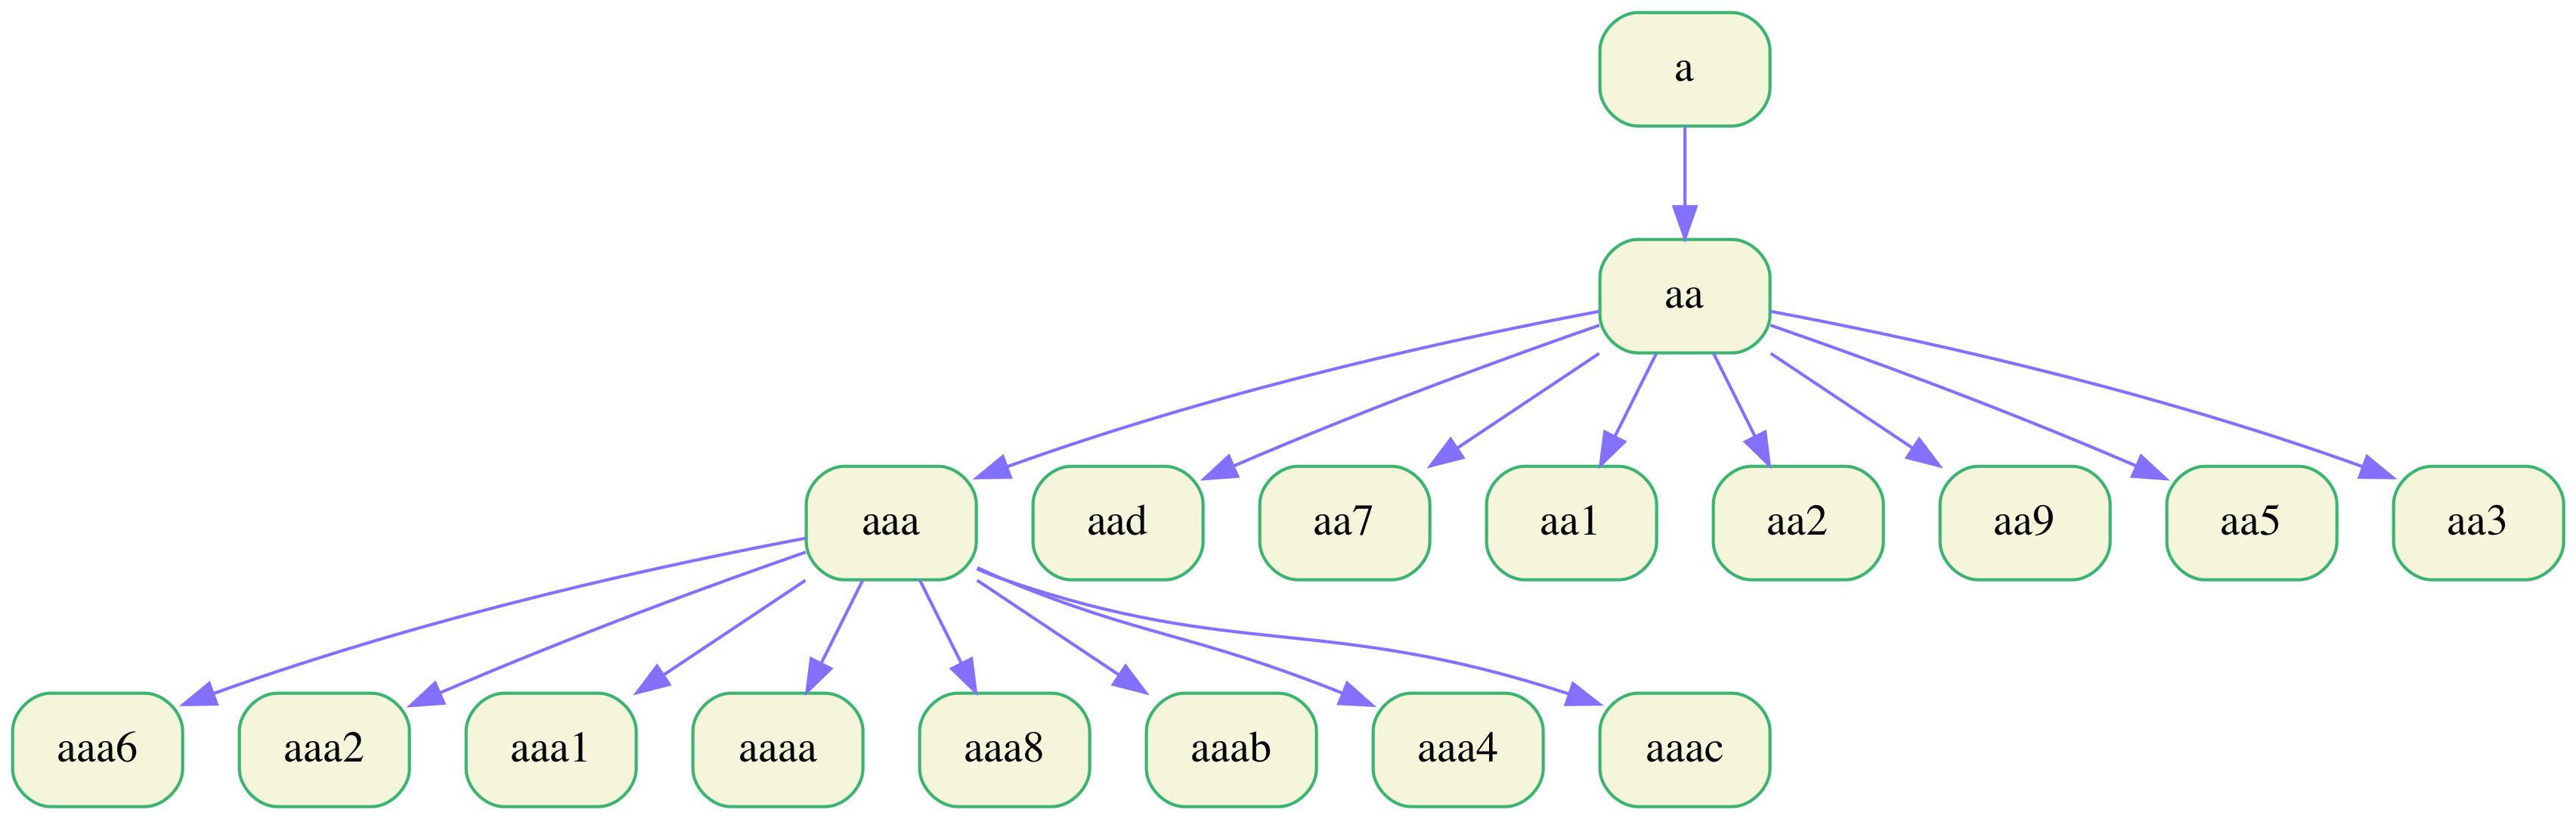

In [13]:
# First, form the KeysGraph object from the dictionary.
G = vd.KeysGraph(pp_dict_starting)

# Then, we can draw this to a file. In this case, ./test.png.
G.draw('data/test.png')

# We can then use the IPython image display function, to display this here in our notebook.
from IPython.display import Image
Image('data/test.png')